## Data Exploration

ET and EEG feature comparison between Normal Reading (NR) and Task Specific Reading (TSR) / Annotation Reading (AR) for [ZuCo](https://osf.io/q3zws/)

In [1]:
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.io as io
import gzip
import math
import matplotlib
import os
import re
import scipy

from utils import *
from plot_funcs import *

In [2]:
#NOTE: don't execute this cell
#TODO: still need to understand why those lines in Maria's code are necessary

#zurich['BNCfreq'] = zurich.WORDstrip.map(lambda x: unigrdict.get(str(x).lower()))
#zurich.BNCfreq = zurich.BNCfreq.fillna(zurich.BNCfreq.min())
#zurich.BNCfreq = zurich.BNCfreq/100 #because 100 million word - to get freq per million
#zurich.BNCfreq = np.log(zurich.BNCfreq)

#zurich['BNCfreqinv']= -zurich.BNCfreq

In [3]:
# instantiate data transformer object for task 1, 2, or 3 on sentence level (no scaling for now)
datatransform_t1 = DataTransformer('task1', level='sentence', scaling='raw', fillna='zeros')
datatransform_t2 = DataTransformer('task2', level='sentence', scaling='raw', fillna='zeros')
datatransform_t3 = DataTransformer('task3', level='sentence', scaling='raw', fillna='zeros')

In [4]:
# get data for all subjects according to settings specified in cell above
# NOTE: data for each sbj will be stored in pd.DataFrame
sbjs_t1 = [datatransform_t1(i) for i in range(12)]
sbjs_t2 = [datatransform_t2(i) for i in range(12)]
sbjs_t3 = [datatransform_t3(i) for i in range(12)]

C:\Users\Lukas\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:4034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [5]:
# for each dataset check whether data is complete and transformation was performed correctly
for i, (sbj_t1, sbj_t2, sbj_t3) in enumerate(zip(sbjs_t1, sbjs_t2, sbjs_t3)):
    print("Subject:", i+1)
    print()
    print("Number of sents for task 1: ", len(sbj_t1))
    print("Number of sents for task 2: ", len(sbj_t2))
    print("Number of sents for task 3: ", len(sbj_t3))
    print()

Subject: 1

Number of sents for task 1:  400
Number of sents for task 2:  300
Number of sents for task 3:  407

Subject: 2

Number of sents for task 1:  400
Number of sents for task 2:  300
Number of sents for task 3:  407

Subject: 3

Number of sents for task 1:  299
Number of sents for task 2:  300
Number of sents for task 3:  407

Subject: 4

Number of sents for task 1:  400
Number of sents for task 2:  300
Number of sents for task 3:  360

Subject: 5

Number of sents for task 1:  400
Number of sents for task 2:  300
Number of sents for task 3:  407

Subject: 6

Number of sents for task 1:  400
Number of sents for task 2:  300
Number of sents for task 3:  407

Subject: 7

Number of sents for task 1:  400
Number of sents for task 2:  250
Number of sents for task 3:  407

Subject: 8

Number of sents for task 1:  400
Number of sents for task 2:  300
Number of sents for task 3:  359

Subject: 9

Number of sents for task 1:  400
Number of sents for task 2:  300
Number of sents for task 3

### Eye-Tracking feature comparison between first and second half of Task 1 (NR)

First and second half of Task 1 (NR Sentiment) have to be compared to inspect whether an order effect has to be reported

In [6]:
# split data into first and second half
first_half, second_half = split_data(sbjs_t1)

In [7]:
# check whether data splitting was performed correctly
for i, (first, second) in enumerate(zip(first_half, second_half)):
    print("Subject:", i)
    print()
    print("Number of sents in first half:", len(first))
    print()
    print("Number of sents in second half:", len(second))
    print()

Subject: 0

Number of sents in first half: 200

Number of sents in second half: 200

Subject: 1

Number of sents in first half: 200

Number of sents in second half: 200

Subject: 2

Number of sents in first half: 149

Number of sents in second half: 150

Subject: 3

Number of sents in first half: 200

Number of sents in second half: 200

Subject: 4

Number of sents in first half: 200

Number of sents in second half: 200

Subject: 5

Number of sents in first half: 200

Number of sents in second half: 200

Subject: 6

Number of sents in first half: 200

Number of sents in second half: 200

Subject: 7

Number of sents in first half: 200

Number of sents in second half: 200

Subject: 8

Number of sents in first half: 200

Number of sents in second half: 200

Subject: 9

Number of sents in first half: 200

Number of sents in second half: 200

Subject: 10

Number of sents in first half: 200

Number of sents in second half: 200

Subject: 11

Number of sents in first half: 200

Number of sents

In [8]:
fix_sbj_3 = [val for i, sbj in enumerate(first_half) for val in sbj.nFixations.values if i == 2]

In [9]:
# get all fixations
all_fixations_t1_first = np.array([val[0] for sbj in first_half for val in sbj.nFixations.values])
all_fixations_t1_second = np.array([val[0] for sbj in second_half for val in sbj.nFixations.values])

# get mean values for specified features per word for each subject
mean_fixations_t1_first = [sbj.nFixations.mean()[0] for sbj in first_half]
mean_fixations_t1_second = [sbj.nFixations.mean()[0] for sbj in second_half]

mean_omissions_t1_first = [sbj.omissionRate.mean()[0] for sbj in first_half]
mean_omissions_t1_second = [sbj.omissionRate.mean()[0] for sbj in second_half]

mean_trt_t1_first = [sbj.TRT.mean()[0] for sbj in first_half]
mean_trt_t1_second = [sbj.TRT.mean()[0] for sbj in second_half]

mean_gd_t1_first = [sbj.GD.mean()[0] for sbj in first_half]
mean_gd_t1_second = [sbj.GD.mean()[0] for sbj in second_half]

mean_ffd_t1_first = [sbj.FFD.mean()[0] for sbj in first_half]
mean_ffd_t1_second = [sbj.FFD.mean()[0] for sbj in second_half]

#### Mean fixations per word per subject

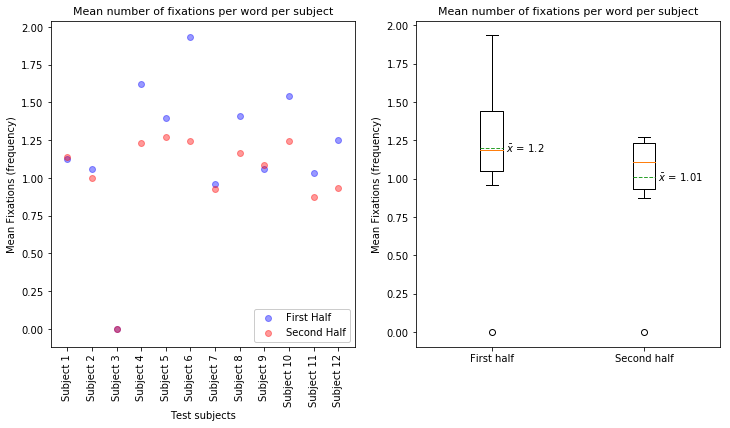

In [10]:
plot_fix(mean_fixations_t1_first, mean_fixations_t1_second)

#### Omission rate on sentence level

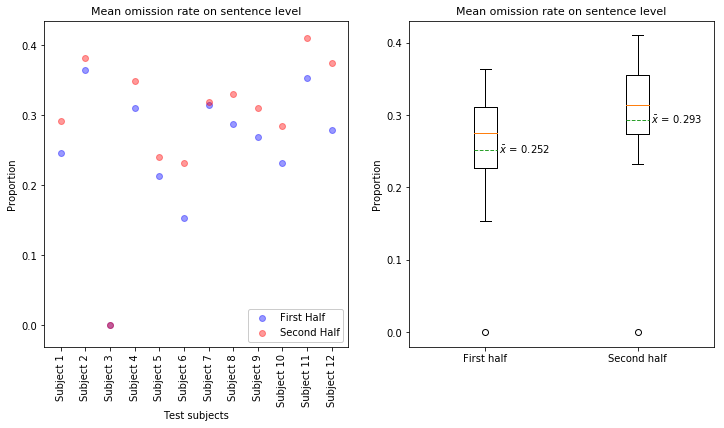

In [11]:
plot_omissions(mean_omissions_t1_first, mean_omissions_t1_second)

#### Mean GD per word per subject

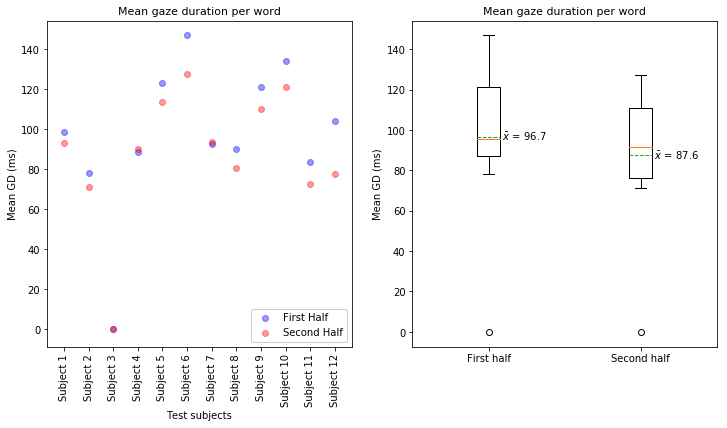

In [12]:
plot_gd(mean_gd_t1_first, mean_gd_t1_second)

#### Mean TRT per word per subject

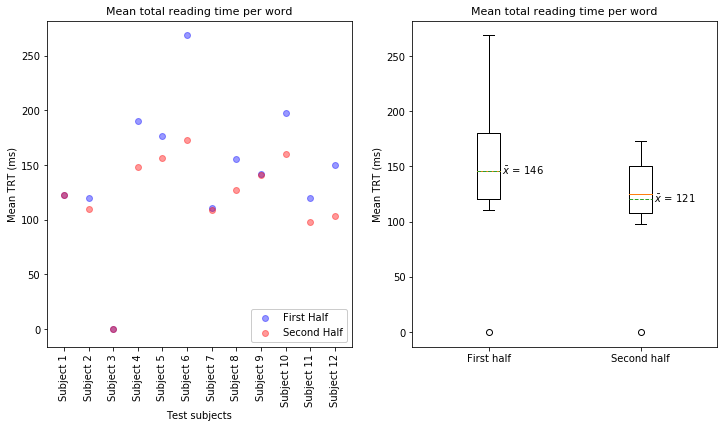

In [13]:
plot_trt(mean_trt_t1_first, mean_trt_t1_second)

#### Mean FFD per word per subject

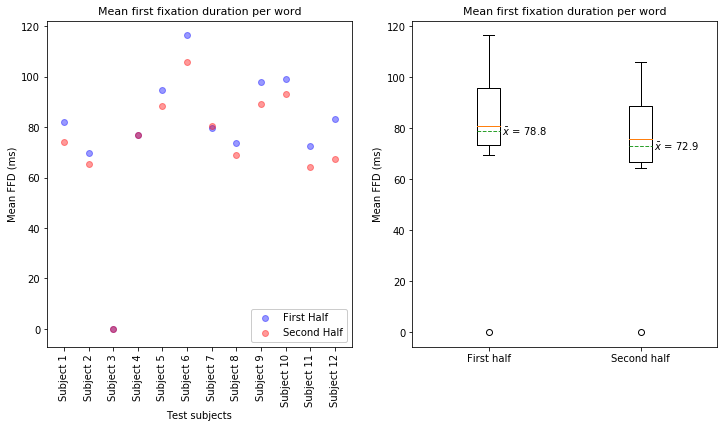

In [14]:
plot_ffd(mean_ffd_t1_first, mean_ffd_t1_second)

### Eye-Tracking feature comparison between Task 2 (NR) and Task 3 (TSR)

In [15]:
# get all fixations
all_fixations_t2 = np.array([val[0] for sbj in sbjs_t2 for val in sbj.nFixations.values])
all_fixations_t3 = np.array([val[0] for sbj in sbjs_t3 for val in sbj.nFixations.values])

# get mean values for specified features per word for each subject
mean_fixations_t2 = [sbj.nFixations.mean()[0] for sbj in sbjs_t2]
mean_fixations_t3 = [sbj.nFixations.mean()[0] for sbj in sbjs_t3]

mean_omissions_t2 = [sbj.omissionRate.mean()[0] for sbj in sbjs_t2]
mean_omissions_t3 = [sbj.omissionRate.mean()[0] for sbj in sbjs_t3]

mean_trt_t2 = [sbj.TRT.mean()[0] for sbj in sbjs_t2]
mean_trt_t3 = [sbj.TRT.mean()[0] for sbj in sbjs_t3]

mean_gd_t2 = [sbj.GD.mean()[0] for sbj in sbjs_t2]
mean_gd_t3 = [sbj.GD.mean()[0] for sbj in sbjs_t3]

mean_ffd_t2 = [sbj.FFD.mean()[0] for sbj in sbjs_t2]
mean_ffd_t3 = [sbj.FFD.mean()[0] for sbj in sbjs_t3]

#### Mean fixations per word per subject

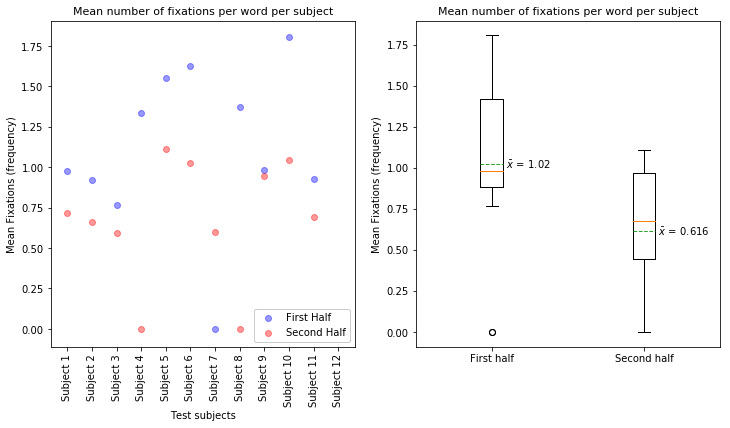

In [16]:
plot_fix(mean_fixations_t2, mean_fixations_t3)

#### Omission rate on sentence level

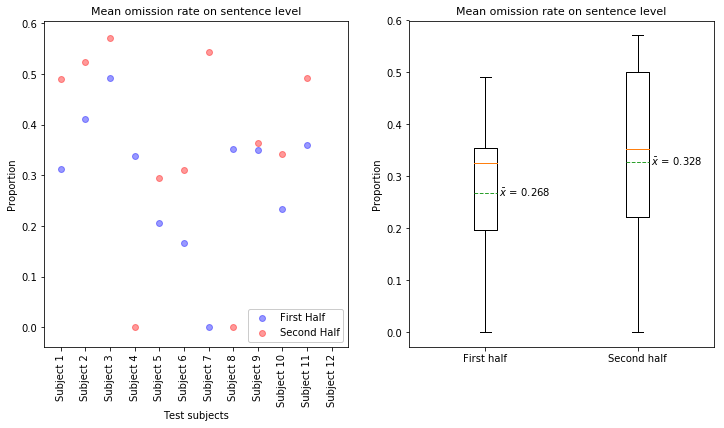

In [17]:
plot_omissions(mean_omissions_t2, mean_omissions_t3)

#### Mean GD per word per subject

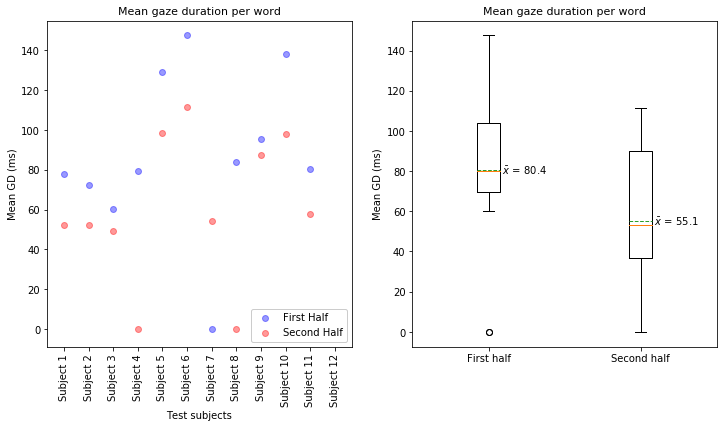

In [18]:
plot_gd(mean_gd_t2, mean_gd_t3)

#### Mean TRT per word per subject

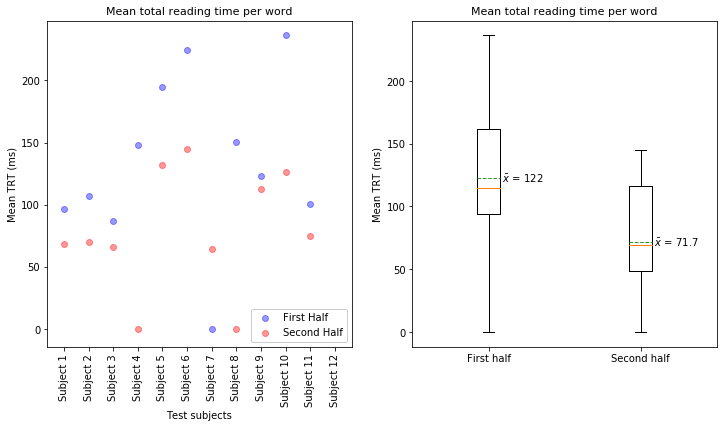

In [19]:
plot_trt(mean_trt_t2, mean_trt_t3)

#### Mean FFD per word per subject

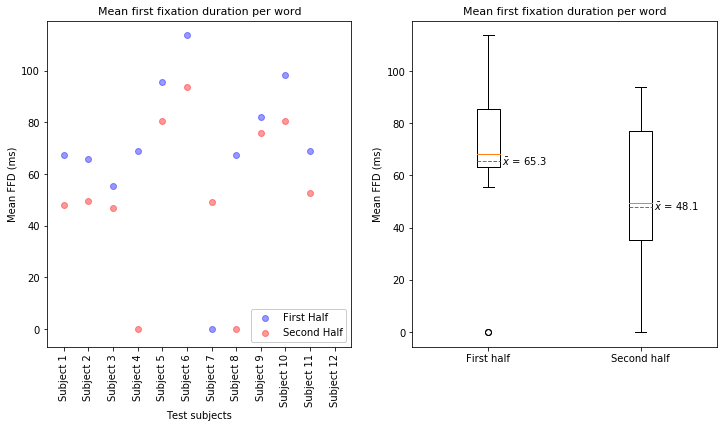

In [20]:
plot_ffd(mean_ffd_t2, mean_ffd_t3)